In [1]:
import pandas as pd
Netflix =pd.read_excel(r"D:/NetFlix_Stock.xlsx",index_col="Date",parse_dates =True)

In [2]:
Netflix.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-04-01,10.517143,10.814286,10.517143,10.714286,13577200
2010-04-05,10.797143,11.437143,10.795714,11.427143,16663500
2010-04-06,11.488571,11.995714,11.405714,11.910000,27422500
2010-04-07,11.727143,11.767143,11.314286,11.390000,25214700
2010-04-08,11.324286,11.714286,11.324286,11.690000,13912500


In [3]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3481 entries, 2010-04-01 to 2024-01-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3481 non-null   float64
 1   High    3481 non-null   float64
 2   Low     3481 non-null   float64
 3   Close   3481 non-null   float64
 4   Volume  3481 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 163.2 KB


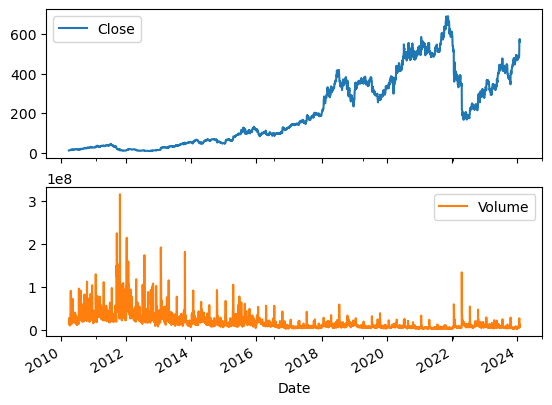

In [4]:
Netflix[["Close","Volume"]].plot(subplots = True,layout = (2,1));

In [5]:
#Rolling forecast ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

train_data,test_data = Netflix[0:int(len(Netflix)*0.9)],Netflix[int(len(Netflix)*0.9):]
train_arima = train_data['Open']
test_arima = test_data['Open']

In [6]:
history = [x for x in train_arima]
y = test_arima
#make first prediction
predictions = list()
model = ARIMA(history, order = (1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14360\3243329699.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [7]:
#Model summary
import statsmodels.api as sm
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3132
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -10504.152
Date:                Wed, 09 Oct 2024   AIC                          21012.304
Time:                        17:59:20   BIC                          21024.403
Sample:                             0   HQIC                         21016.647
                               - 3132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0020      0.008     -0.238      0.812      -0.018       0.014
sigma2        48.0338      0.254    189.274      0.000      47.536      48.531
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [8]:
#Rolling forecast
for i in range(1,len(y)):
    model = ARIMA(history, order = (1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14360\3940951477.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [15]:
mse = mean_squared_error(y, predictions)
print('MSE:' + str(mse))

MSE:81.40795093689599


In [20]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y, predictions)
print('MAE:' + str(mae))

MAE:6.518055808866144


In [21]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y, predictions)
print('RMSE:' + str(rmse))


RMSE:9.022635476228439


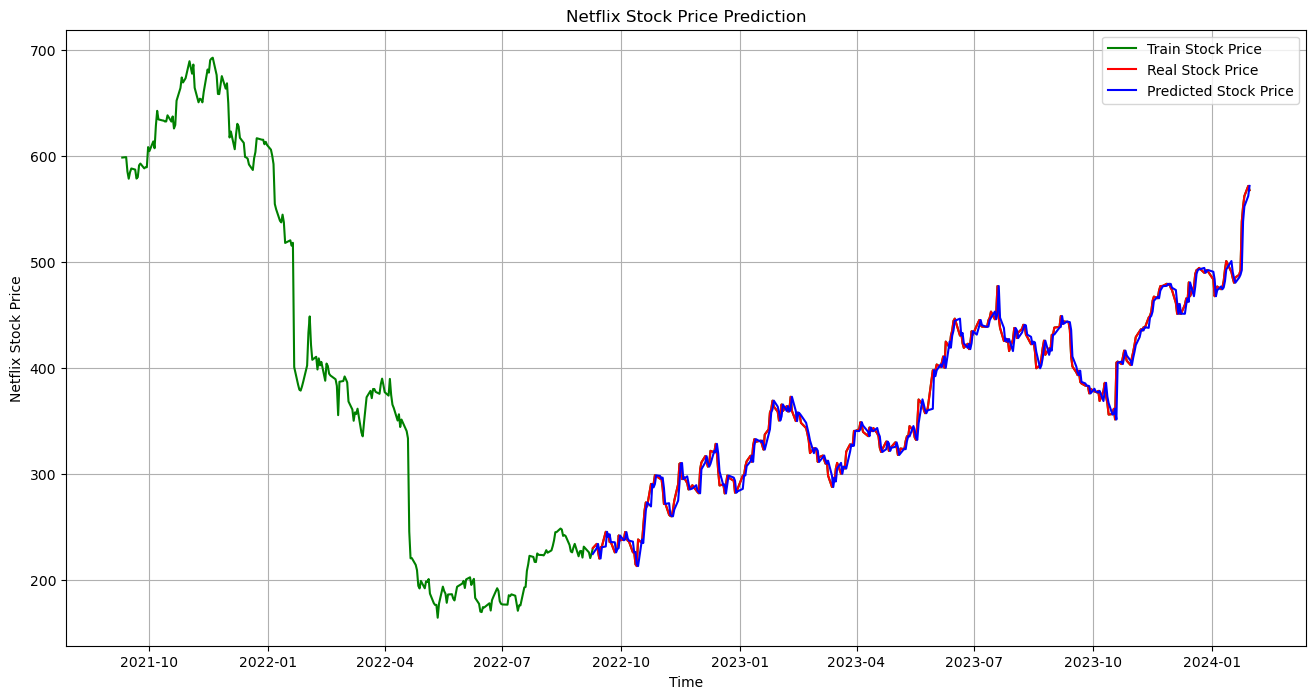

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(Netflix.index[-600:],Netflix['Open'].tail(600),color='green',label='Train Stock Price')
plt.plot(test_data.index,y,color='red',label='Real Stock Price')
plt.plot(test_data.index,predictions,color='blue',label='Predicted Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()